In [39]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from config import img_folder

%matplotlib inline                               

In [22]:
def get_target_labels_distribution():
    # load train_labels
    train_labels = pd.read_csv(img_folder + 'train.csv.tgz', compression='gzip', sep=',')
    train_labels.columns = ['business_id', 'labels']
    result = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    reuslt_names = ['0: good_for_lunch', '1:good_for_dinner', '2:takes_reservations', '3:outdoor_seating', '4:restaurant_is_expensive', '5:has_alcohol', '6:has_table_service', '7:ambience_is_classy', '8:good_for_kids']
    
    for _, row in train_labels.iterrows():
        if isinstance(row['labels'], float) and math.isnan(row['labels']):
            continue
            
        labels = row['labels'].split(" ")
        for label in labels:
            result[int(label)] += 1

    return reuslt_names, result

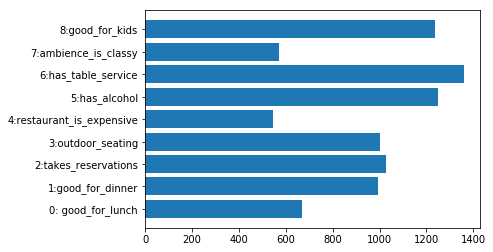

In [44]:
labels_names, labels_values = get_target_labels_distribution()

# plot target labels' distribution 
fig, ax = plt.subplots()
y_pos = np.arange(len(labels_names))
ax.barh(y_pos, labels_values, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_names)
plt.show()